In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_features_orb(image_left, image_aux):
    """
    Match features between two images using ORB and the Brute Force Matcher.
    
    Parameters:
    - image_left: Left camera image.
    - image_aux: Auxiliary camera image.
    
    Returns:
    - Matches: The best matches found between the images.
    """
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors in both images
    kp_left, des_left = orb.detectAndCompute(image_left, None)
    kp_aux, des_aux = orb.detectAndCompute(image_aux, None)

    # Use Brute Force Matcher to match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)  # Using Hamming distance for binary descriptors
    matches = bf.match(des_left, des_aux)  # Get the matches

    # Sort the matches based on distance (best match first)
    matches = sorted(matches, key = lambda x: x.distance)

    return matches, kp_left, kp_aux

def draw_matches(image_left, image_aux, kp_left, kp_aux, matches):
    """
    Draw the matches between two images using Matplotlib.
    
    Parameters:
    - image_left: Left camera image.
    - image_aux: Auxiliary camera image.
    - kp_left: Keypoints in the left camera image.
    - kp_aux: Keypoints in the auxiliary camera image.
    - matches: The best matches found between the images.
    
    Returns:
    - None (displays the images with matches).
    """
    # Draw the first 10 matches
    img_matches = cv2.drawMatches(image_left, kp_left, image_aux, kp_aux, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the matches
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.title("ORB Feature Matches")
    plt.show()

def apply_lowe_ratio_test(matches, ratio=0.75):
    """
    Apply Lowe's ratio test to filter matches.
    
    Parameters:
    - matches: Raw matches between the descriptors.
    - des_left: Descriptors for the left camera image.
    - des_aux: Descriptors for the auxiliary camera image.
    - ratio: The ratio threshold for filtering.
    
    Returns:
    - filtered_matches: The matches that passed the ratio test.
    """
    good_matches = []
    for m, n in matches:
        # m and n are two matches; m is the closest, n is the second closest
        if m.distance < ratio * n.distance:
            good_matches.append(m)
    return good_matches




# Example data
image_left = cv2.imread("left_image.png", cv2.IMREAD_GRAYSCALE)  # Left camera image
image_aux = cv2.imread("auxiliary_image.png", cv2.IMREAD_GRAYSCALE)  # Auxiliary camera image

# Perform feature matching using ORB
matches, kp_left, kp_aux = match_features_orb(image_left, image_aux)








# Perform feature matching
matches, kp_left, kp_aux = match_features_orb(image_left, image_aux)

# Apply Lowe's ratio test
good_matches = apply_lowe_ratio_test(matches)

# Draw the good matches
draw_matches(image_left, image_aux, kp_left, kp_aux, good_matches)



error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


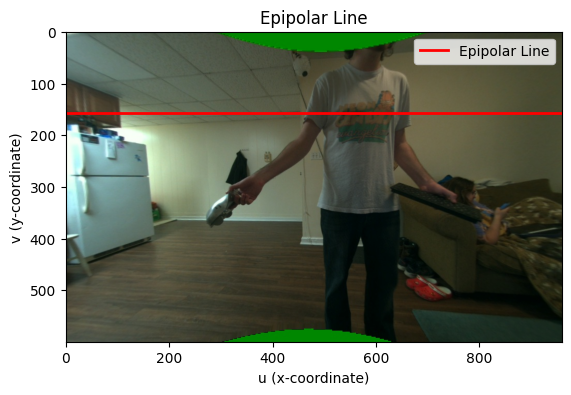

In [ ]:
def apply_lowe_ratio_test(matches, des_left, des_aux, ratio=0.75):
    """
    Apply Lowe's ratio test to filter matches.
    
    Parameters:
    - matches: Raw matches between the descriptors.
    - des_left: Descriptors for the left camera image.
    - des_aux: Descriptors for the auxiliary camera image.
    - ratio: The ratio threshold for filtering.
    
    Returns:
    - filtered_matches: The matches that passed the ratio test.
    """
    good_matches = []
    for m, n in matches:
        # m and n are two matches; m is the closest, n is the second closest
        if m.distance < ratio * n.distance:
            good_matches.append(m)
    return good_matches




# Perform feature matching
matches, kp_left, kp_aux = match_features_orb(image_left, image_aux)

# Apply Lowe's ratio test
good_matches = apply_lowe_ratio_test(matches, des_left, des_aux)

# Draw the good matches
draw_matches(image_left, image_aux, kp_left, kp_aux, good_matches)


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_features_orb_with_lowe(image_left, image_aux, ratio=0.75):
    """
    Match features between two images using ORB and apply Lowe's ratio test to filter good matches.
    
    Parameters:
    - image_left: Left camera image.
    - image_aux: Auxiliary camera image.
    - ratio: Ratio threshold for Lowe's ratio test.
    
    Returns:
    - good_matches: A list of the best matches after applying Lowe's ratio test.
    - kp_left: Keypoints in the left camera image.
    - kp_aux: Keypoints in the auxiliary camera image.
    """
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors in both images
    kp_left, des_left = orb.detectAndCompute(image_left, None)
    kp_aux, des_aux = orb.detectAndCompute(image_aux, None)

    # Use Brute Force Matcher to match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)  # Don't cross-check for ratio test
    raw_matches = bf.knnMatch(des_left, des_aux, k=2)  # Find the two best matches for each descriptor

    # Apply Lowe's ratio test to filter good matches
    good_matches = []
    for m, n in raw_matches:
        if m.distance < ratio * n.distance:
            good_matches.append(m)

    return good_matches, kp_left, kp_aux

def draw_matches(image_left, image_aux, kp_left, kp_aux, matches):
    """
    Draw the matches between two images using Matplotlib.
    
    Parameters:
    - image_left: Left camera image.
    - image_aux: Auxiliary camera image.
    - kp_left: Keypoints in the left camera image.
    - kp_aux: Keypoints in the auxiliary camera image.
    - matches: The best matches found between the images.
    
    Returns:
    - None (displays the images with matches).
    """
    # Draw the good matches
    img_matches = cv2.drawMatches(image_left, kp_left, image_aux, kp_aux, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the matches
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.title("ORB Feature Matches")
    plt.show()

# Example usage
image_left = cv2.imread("left_image.png", cv2.IMREAD_GRAYSCALE)  # Left camera image
image_aux = cv2.imread("auxiliary_image.png", cv2.IMREAD_GRAYSCALE)  # Auxiliary camera image

# Perform feature matching using ORB and apply Lowe's ratio test
good_matches, kp_left, kp_aux = match_features_orb_with_lowe(image_left, image_aux, ratio=0.75)

# Draw and display the best matches
draw_matches(image_left, image_aux, kp_left, kp_aux, good_matches)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
